<a href="https://colab.research.google.com/github/csanadferencz/CVSHomework/blob/master/CVSHomework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Vision Systems Homework
## Traditional Vision
In this notebook we demonstrate the usage of simple computer vision algorithms using OpenCV and Python

### Installing OpenCV

In [12]:
!pip install opencv-python

### Downloading images

In [13]:
# Homework dataset
!wget http://deeplearning.iit.bme.hu/CVS/HW.zip
!unzip -qq HW.zip
!rm HW.zip

# Traffic Sign Classification set
!wget http://deeplearning.iit.bme.hu/CVS/trafficSignsHW.zip
!unzip -qq trafficSignsHW.zip
!rm trafficSignsHW.zip

--2020-05-08 08:46:47--  http://deeplearning.iit.bme.hu/CVS/HW.zip
Resolving deeplearning.iit.bme.hu (deeplearning.iit.bme.hu)... 152.66.243.112
Connecting to deeplearning.iit.bme.hu (deeplearning.iit.bme.hu)|152.66.243.112|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14450183 (14M) [application/zip]
Saving to: ‘HW.zip’

HW.zip              100%[===================>]  13.78M  8.45MB/s    in 1.6s    

2020-05-08 08:46:50 (8.45 MB/s) - ‘HW.zip’ saved [14450183/14450183]

--2020-05-08 08:46:55--  http://deeplearning.iit.bme.hu/CVS/trafficSignsHW.zip
Resolving deeplearning.iit.bme.hu (deeplearning.iit.bme.hu)... 152.66.243.112
Connecting to deeplearning.iit.bme.hu (deeplearning.iit.bme.hu)|152.66.243.112|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 175675617 (168M) [application/zip]
Saving to: ‘trafficSignsHW.zip’

trafficSignsHW.zip  100%[===================>] 167.54M  20.5MB/s    in 9.1s    

2020-05-08 08:47:05 (18.4 MB/s) - ‘traff

## Image basics
### Read and dislay

TypeError: ignored

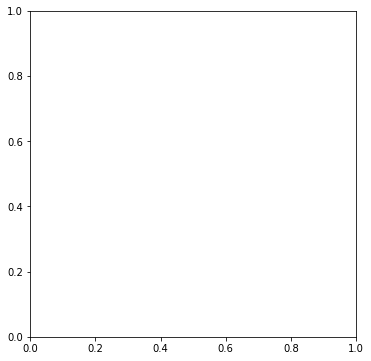

In [14]:
#OpenCV
import cv2

#Numpy - numeric library
import numpy as np

#Plotting
import matplotlib.pyplot as plt

#This way it doesn't try to open a window un the GUI - works in python notebook
%matplotlib inline

# Reading image
img = cv2.imread("trafficSgnsHW/testFULL/Crossing (blue)/img(8401).jpg")

# Creating figure and show
plt.figure(figsize=(6,6))
plt.imshow(img)

### Color space conversions

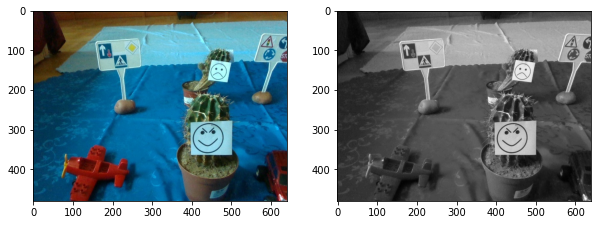

In [0]:
# Converting BGR it to RGB
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

# Creating also a grayscale version
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Figure with subplots
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.subplot(1,2,2)
plt.imshow(img_gray,cmap='gray')

### Thresholding

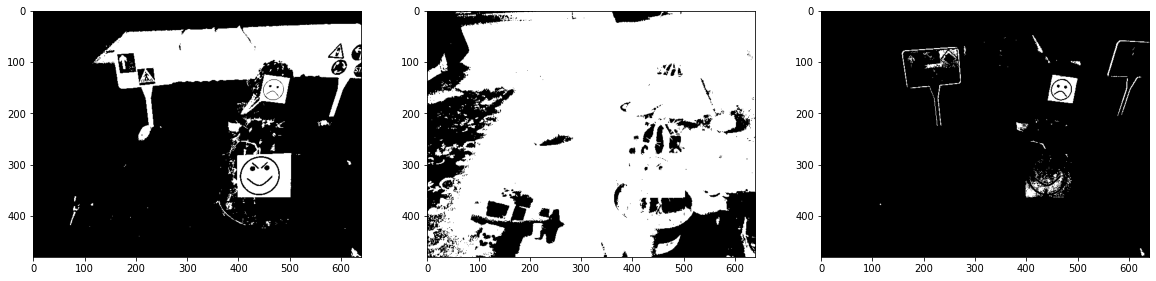

In [0]:
# Thresholding with 3 different threshold values
# _,ret = function() means that we only care about the second return value
_,img_bin = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
_,img_bin2 = cv2.threshold(img_gray, 50, 255, cv2.THRESH_BINARY)
_,img_bin3 = cv2.threshold(img_gray, 200, 255, cv2.THRESH_BINARY)

# Plotting
plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(img_bin,cmap='gray')
plt.subplot(1,3,2)
plt.imshow(img_bin2,cmap='gray')
plt.subplot(1,3,3)
plt.imshow(img_bin3,cmap='gray')

### Histogram and equalization

<BarContainer object of 256 artists>

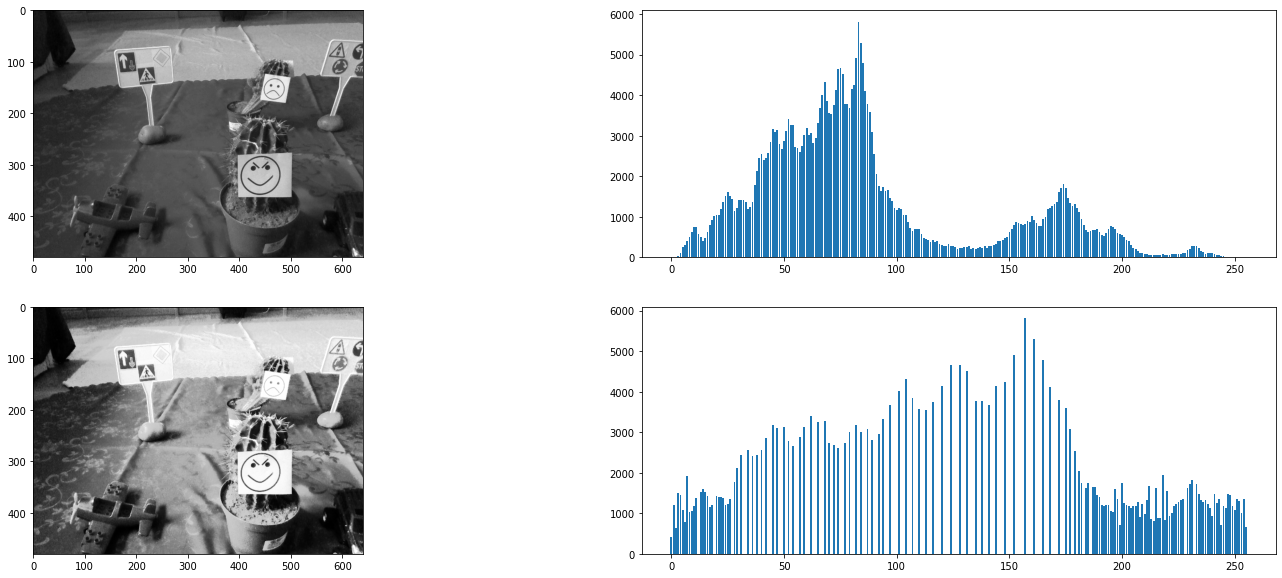

In [0]:
# Computing histogram
hist = cv2.calcHist([img_gray],[0],None,[256],[0,256])

# Equalizing histogram and recompute
img_eq = cv2.equalizeHist(img_gray)
hist2 = cv2.calcHist([img_eq],[0],None,[256],[0,256])

# Plotting
plt.figure(figsize=(25,10))
plt.subplot(2,2,1)
plt.imshow(img_gray,cmap='gray')
plt.subplot(2,2,2)
plt.bar(np.arange(256),hist[:,0])
plt.subplot(2,2,3)
plt.imshow(img_eq,cmap='gray')
plt.subplot(2,2,4)
plt.bar(np.arange(256),hist2[:,0])

### Filtering
#### Add noise

In [0]:
# Adding noise to the image
def noisy(noise_typ,image):
    if noise_typ == "gauss":
        row,col= image.shape
        mean = 0
        sigma = 15
        # Create random gaussian
        gauss = np.random.normal(mean,sigma,(row,col))
        # Make sure it has the same shape
        gauss = gauss.reshape(row,col)
        noisy = image + gauss
        return noisy
    elif noise_typ == "snp":
        row,col = image.shape
        s_vs_p = 0.5
        amount = 0.02
        out = np.copy(image)
        # Number of salt (half of total)
        num_salt = np.ceil(amount * image.size * s_vs_p)
        # Random locations
        coords = tuple([np.random.randint(0, i - 1, int(num_salt)) for i in image.shape])
        out[coords] = 255

        # Number of pepper (half of total)
        num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
        # Random locations
        coords = tuple([np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape])
        out[coords] = 0
        return out

#### Create images

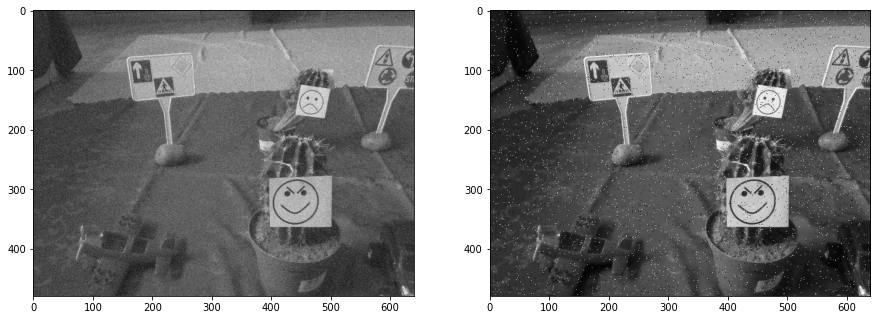

In [0]:
# Creating noisy images
img_gauss = noisy("gauss",img_gray)
img_snp = noisy("snp",img_gray)

plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(img_gauss,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(img_snp,cmap='gray')

#### Filter Images

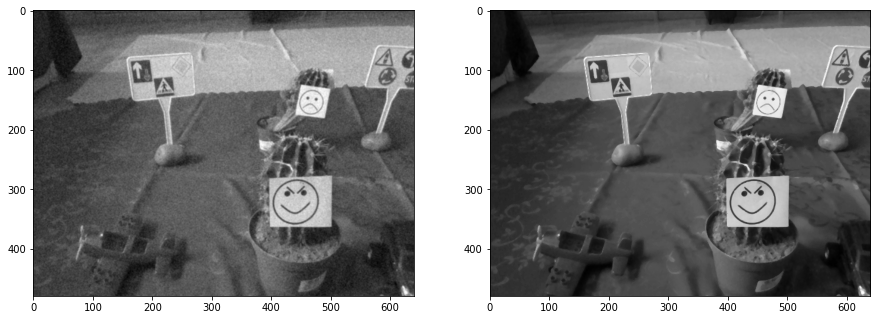

In [0]:
# Gaussian and median filtering
img_gfilt = cv2.GaussianBlur(img_gauss,(3,3),0)
img_mfilt = cv2.medianBlur(img_snp,3)

plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(img_gfilt,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(img_mfilt,cmap='gray')

## Feature detection

### Edges

#### Sobel and Laplace

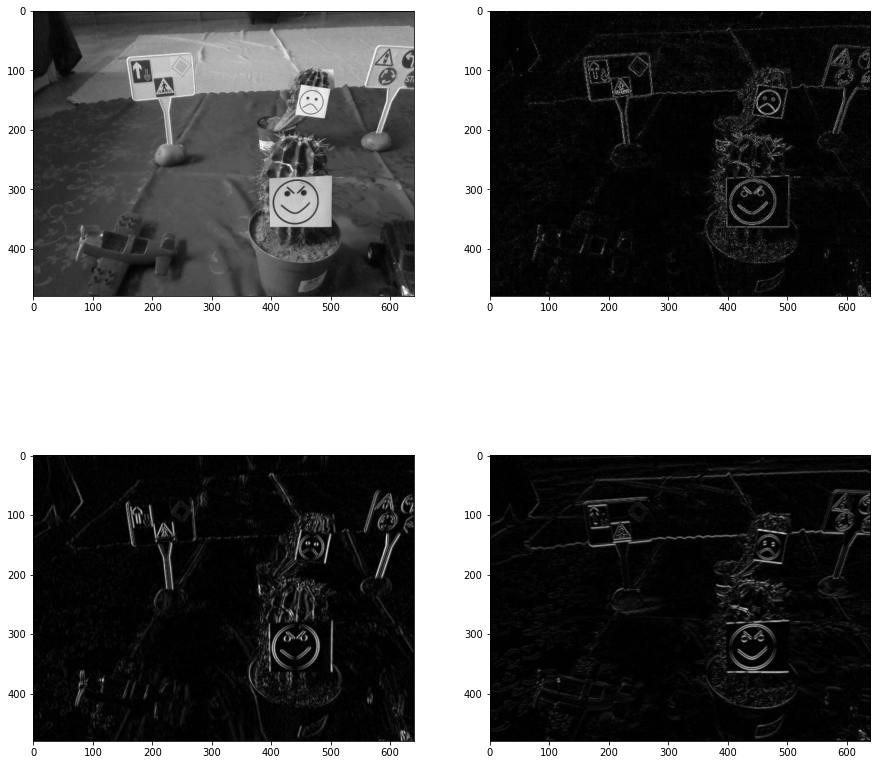

In [0]:
# Zero in second arguments meaning grayscale
featImg = cv2.imread("HW/g3/rgb/1.jpg",0)

# Computing filtered values
laplacian = np.absolute(cv2.Laplacian(featImg,cv2.CV_64F))
sobelx = np.absolute(cv2.Sobel(featImg,cv2.CV_64F,1,0,ksize=5))
sobely = np.absolute(cv2.Sobel(featImg,cv2.CV_64F,0,1,ksize=5))

plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.imshow(featImg,cmap='gray')
plt.subplot(2,2,2)
plt.imshow(laplacian,cmap='gray')
plt.subplot(2,2,3)
plt.imshow(sobelx,cmap='gray')
plt.subplot(2,2,4)
plt.imshow(sobely,cmap='gray')

### Canny and Hough



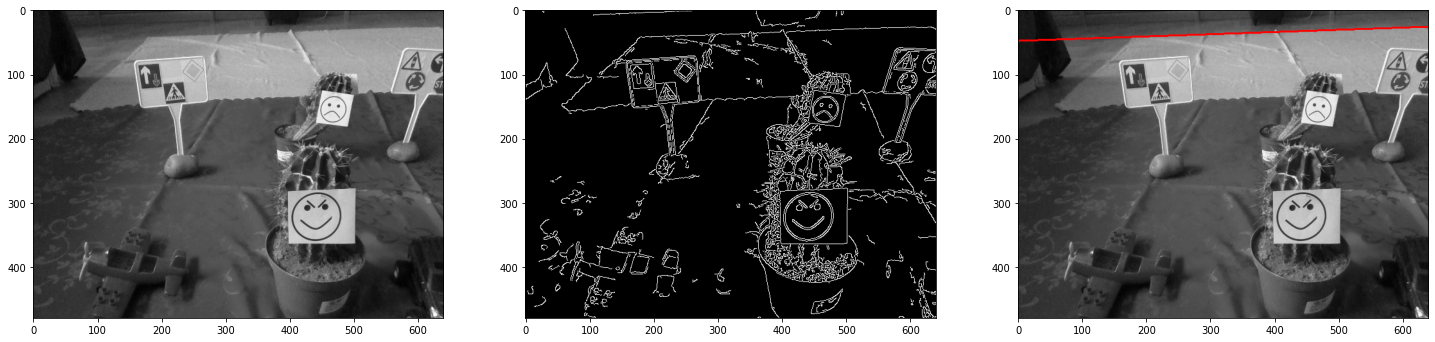

In [0]:
# Running Canny
edges = cv2.Canny(featImg,50,120)

# Running Hough transform
# Second and third arguments are the resolution of r and theta
# Fourth argument is the amount of votes needed for a positive line detection
lines = cv2.HoughLines(edges,1,np.pi/180,150)

# Drawing lines on the image
lineIm = cv2.cvtColor(featImg,cv2.COLOR_GRAY2BGR)

for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(lineIm,(x1,y1),(x2,y2),(255,0,0),2)

plt.figure(figsize=(25,25))
plt.subplot(1,3,1)
plt.imshow(featImg,cmap='gray')
plt.subplot(1,3,2)
plt.imshow(edges,cmap='gray')
plt.subplot(1,3,3)
plt.imshow(lineIm,cmap='gray')

### Template Matching

In [11]:
# Loading image and template
mario_rgb = cv2.imread('HW/g3/rgb/1.jpg',0)
mario_gray = cv2.cvtColor(mario_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('trafficSgnsHW/testFULL/Crossing (blue)/img(8401).jpg',0)
w, h = template.shape[::-1]
   
# Running template matching
res = cv2.matchTemplate(mario_gray,template,cv2.TM_CCOEFF_NORMED)

# Getting locations where the correlation is larger than the threshold
threshold = 0.8
loc = np.where(res >= threshold)

# Drawing
for pt in zip(*loc[::-1]):
    cv2.rectangle(mario_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
    
mario_rgb = cv2.cvtColor(mario_rgb, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(mario_rgb)

NameError: ignored

### ORB Keypoint Matching

In [1]:
img1 = cv2.imread('HW/g3/rgb/1.jpg',0)          # queryImage
img2 = cv2.imread('trafficSgnsHW/testFULL/Crossing (blue)/img(8401).jpg',0) # trainImage
    
# Initiating ORB detector
orb = cv2.ORB_create()

# Finding the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

# BFMatcher with default params Note: Hamming distance
bf = cv2.BFMatcher(cv2.NORM_HAMMING)

# Finding the two best matches for every keypoint
matches = bf.knnMatch(des1,des2, k=2)

# Applying ratio test: the best match is much better 
# than the second best, we keep the match
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

# cv2.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=2)

plt.figure(figsize=(20,20))
plt.imshow(img3)

NameError: ignored

## Binary Images

### Erosion, dilation

In [2]:
j_img = cv2.imread('HW/g3/rgb/1.jpg',0)

# Creating structuring element
kernel = np.ones((5,5),np.uint8)

# EXERCISE: see the effect of the number of iterations
erosion = cv2.erode(j_img,kernel,iterations = 1)
dilation = cv2.dilate(j_img,kernel,iterations = 1)

plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.imshow(j_img,cmap='gray')
plt.subplot(1,3,2)
plt.imshow(erosion,cmap='gray')
plt.subplot(1,3,3)
plt.imshow(dilation,cmap='gray')

NameError: ignored

### Opening, Closing

In [0]:
opening = cv2.imread('opening.png',0)
closing = cv2.imread('closing.png',0)

opened = cv2.morphologyEx(opening, cv2.MORPH_OPEN, kernel)
closed = cv2.morphologyEx(closing, cv2.MORPH_CLOSE, kernel)

plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.imshow(opening,cmap='gray')
plt.subplot(2,2,2)
plt.imshow(opened,cmap='gray')
plt.subplot(2,2,3)
plt.imshow(closing,cmap='gray')
plt.subplot(2,2,4)
plt.imshow(closed,cmap='gray')

## Video Analytics
### Create progress bar

In [0]:
from IPython.display import HTML, display

def progress(value, max=100):
    return HTML("""
        <progress
            value='{value}'
            max='{max}',
            style='width: 100%'
        >
            {value}
        </progress>
    """.format(value=value, max=max))

### Background Subtraction

In [0]:
# Reading input video and get number of frames
cap = cv2.VideoCapture("vtest.avi")
length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
     
# Reading first frame
ret, frame1 = cap.read()

# Initializing the output video
frame_height,frame_width,_ = frame1.shape
out = cv2.VideoWriter('bg.mp4',cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width*2,frame_height))

# Creating Gaussian background subtractor
fgbg = cv2.bgsegm.createBackgroundSubtractorMOG()

# Starting progress bar
cntr = 0
bar = display(progress(cntr, length), display_id=True)
     
while(1):
    # Return once we no longer get frames
    ret, frame2 = cap.read()
    if not ret:
        break
        
    # Applying subtraction
    fgmask = fgbg.apply(frame2)
    
    # Converting back for visualization
    bgr = cv2.cvtColor(fgmask,cv2.COLOR_GRAY2BGR)
    
    # Putting the original video and the optical flow side-by-side and write
    frame = np.concatenate((frame2,bgr),1)
    out.write(frame)
    
    # Updating previous frame and progress bar
    cntr += 1
    bar.update(progress(cntr, length))

# Cleaning up
cap.release()
out.release()

## Download video files
To download the created videos, click the ![alt text](http://3dmr.iit.bme.hu/edu/DL/icon.png) icon on the top left, then select the files tab. From there, right click **optflow.mp4** and **bg.mp4** to download them to your computer.